# Q 2-3: Analyzing the potential correlation between the number of electric vehicles registered in Washington State by county verses the median income per capita, and the population size of each county
Multiple sources of data were compiled together to create a scatter plot that shows whether or not there is a tangible relationship between electric vehicle ownership and income. Another scatter plot was made to determine the relationship between electric vehicle ownership and total population of adults in each county in Washington. 

After analyzing the data, there does seem to be a positive correlation between the number of electric vehicles and higher incomes, as well as a higher concentration of electric vehicles in more densely populated areas. There are a few reasons why this relationship is prevelent.

The first indicator that a person is more likely to own or purchase an electric vehicle is their income. Higher incomes correlate to higher rates of electric vehicle ownership because electric vehicles are on average more expensive than gasoline vehicles, making them harder to access for people who have lower incomes. 

The second indicator that a person is more likely to own or purchase an electric vehicle is their location. Specifically larger, more densely populated counties have higher rates of electric vehicle ownership. This is due to a few reasons, including one that has been already discussed: income. It is shown in the data that the largest counties in Washington also have the highest median income, which is related to ev ownership. However, it can also be speculated that people in smaller, less densely populated counties choose not to own an electric vehicle due to its known unreliability in areas with poor internet connection, or the lack of charging stations available in those smaller counties. Further analasis would be needed in order to verify these hypotheses.


In [3]:
import pandas as pd
from IPython.display import display
import os
import hvplot.pandas
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from scipy import stats
import numpy as np

In [4]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)
# My research questions are: Correlation of #EV per county vs income (scatter plot) and Correlation of #EV per county vs population size (scatter plot)

Current Working Directory: C:\Users\aisev\Documents\Project_1


In [5]:
df1 = pd.read_csv("../P1_Repository/FINAL_Project_1_T3/EvProjectPy/Resources/washington_income.csv")
df2 = pd.read_csv("../P1_Repository/FINAL_Project_1_T3/EvProjectPy/Resources/washington_population.csv")
df3 = pd.read_csv("../P1_Repository/FINAL_Project_1_T3/EvProjectPy/Resources/Electric_Vehicle_Population_Data.csv")



In [6]:
# Merge the first 2 dataframes
merged_df = pd.merge(df1, df2, on='County')
merged_df.head(5)

,County,FIPS_x,Value (Dollars),Rank within US (of 3142 counties),FIPS_y,Value (Percent),People (Age 18-39),Rank within US (of 3143 counties)
0,United States,0,"75,149",NaN,0,29.8,98679467,NaN
1,Washington,53000,"90,325",8 of 52,53000,31.2,2397858,45 of 52
2,Whitman County,53075,"49,345","2,579",53075,53.4,25192,"3,137"
3,Ferry County,53019,"50,424","2,515",53019,19.0,1382,97
4,Garfield County,53023,"57,958","1,869",53023,20.8,480,222


In [7]:
columns_list = merged_df.columns.tolist()
print(columns_list)

['County', ' FIPS_x', 'Value (Dollars)', 'Rank within US (of 3142 counties)', ' FIPS_y', 'Value (Percent)', 'People (Age 18-39)', 'Rank within US (of 3143 counties)']


In [8]:
# drop unnecessary columns
new_df = merged_df.drop(columns=[' FIPS_x', ' FIPS_y', 'Value (Percent)', 'Rank within US (of 3142 counties)', 'Rank within US (of 3143 counties)'],)
# drop rows for Washington and United States so these totals don't interfere with future visualizations
new_df1 = new_df.drop(index=[0, 1])
new_df1.columns = ['County', 'Income', 'Population (Age 18-39)']
# Re-name every row under County so that the word County is deleted from each row
new_df1['County'] = new_df1['County'].str.replace(' County', '', regex=False)
new_df1.head(5)


,County,Income,Population (Age 18-39)
2,Whitman,"49,345",25192
3,Ferry,"50,424",1382
4,Garfield,"57,958",480
5,Okanogan,"58,218",10104
6,Pacific,"58,889",4460


In [9]:
# drop unnecessary columns
df3a = df3.filter(items=['County'])
# Count how many times each county appears in the EV df
counts = df3a['County'].value_counts()
print(counts)

County
King         107115
Snohomish     25392
Pierce        16677
Clark         12537
Thurston       7719
              ...  
York              1
St. Louis         1
El Dorado         1
Doña Ana          1
Pima              1
Name: count, Length: 203, dtype: int64


In [10]:
# Merge EV data with Washington income/population data
ev_df = pd.merge(counts, new_df1, on='County', how='left')
ev_df = ev_df.rename(columns={'count': 'Electric Vehicles Count'})
display(ev_df)

,County,Electric Vehicles Count,Income,Population (Age 18-39)
0,King,107115,"116,340",782933.0
1,Snohomish,25392,"104,083",250644.0
2,Pierce,16677,"91,486",293056.0
3,Clark,12537,"90,115",143889.0
4,Thurston,7719,"88,895",86850.0
...,...,...,...,...
198,York,1,NaN,NaN
199,St. Louis,1,NaN,NaN
200,El Dorado,1,NaN,NaN
201,Doña Ana,1,NaN,NaN


In [11]:
# Drop columns with NaN values
ev_df_cleaned = ev_df.dropna(axis=0)

display(ev_df_cleaned.head(5))
# print(ev_df_cleaned['Electric Vehicles Count'].describe())


,County,Electric Vehicles Count,Income,Population (Age 18-39)
0,King,107115,"116,340",782933.0
1,Snohomish,25392,"104,083",250644.0
2,Pierce,16677,"91,486",293056.0
3,Clark,12537,"90,115",143889.0
4,Thurston,7719,"88,895",86850.0


In [12]:
# convert Income and Electric Vehichles to numeric
ev_df_cleaned.loc[:, 'Income'] = pd.to_numeric(ev_df_cleaned.loc[:, 'Income'].str.replace(',', ''))

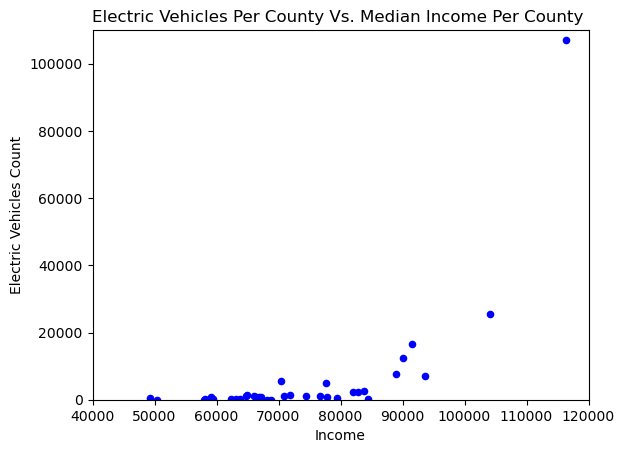

In [13]:
# Create a scatter plot showing Electric Vehicles vs. Income
ev_df_cleaned.plot.scatter(x='Income', y='Electric Vehicles Count', color='blue')
plt.xlim(40000, 120000) # income from 0-120,000
plt.ylim(0, 110000) # EV count from 0 to 110,000

# Add title and labels
plt.title('Electric Vehicles Per County Vs. Median Income Per County ')
plt.xlabel('Income')
plt.ylabel('Electric Vehicles Count')

# Show the plot
plt.show()


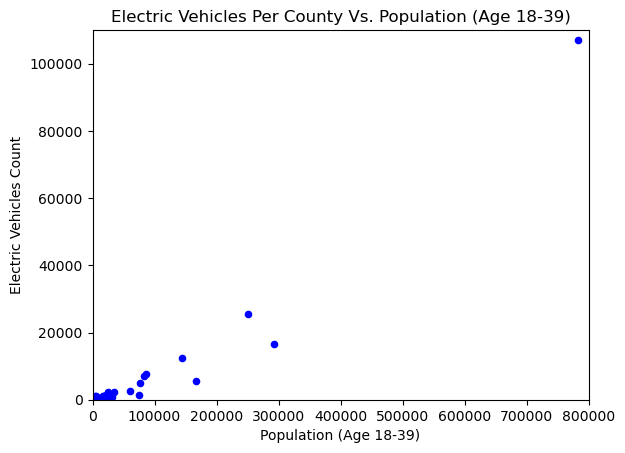

In [14]:
# Create a scatter plot showing Electric Vehicles vs. Population 
ev_df_cleaned.plot.scatter(x='Population (Age 18-39)', y='Electric Vehicles Count', color='blue')
plt.xlim(0, 800000) # population 0 to 800,000
plt.ylim(0, 110000) # EV count from 0 to 110,000

# Add title and labels
plt.title('Electric Vehicles Per County Vs. Population (Age 18-39)')
plt.xlabel('Population (Age 18-39)')
plt.ylabel('Electric Vehicles Count')

# Show the plot
plt.show()
